## Working with Time Series in Pandas

### Your first time series

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods = 7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [41]:
data = pd.read_csv('5_stocks.csv')
data.head()

,Date,AAPL,AMZN,IBM,WMT,XOM
0,2001-07-05,1.66,15.27,NaN,NaN,NaN
1,2001-07-06,1.57,15.27,106.50,47.34,43.40
2,2001-07-09,1.62,15.81,104.72,48.25,43.36
3,2001-07-10,1.51,15.61,101.96,47.50,42.88
4,2001-07-11,1.61,15.34,103.85,48.85,42.48


### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
Date    4001 non-null object
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5), object(1)
memory usage: 187.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None


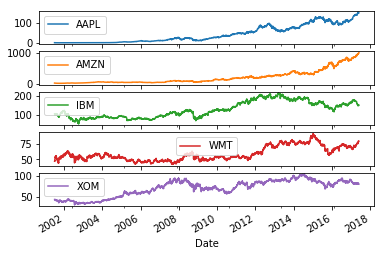

In [42]:
# Inspect data
print(data.info())

# Convert the date column to datetime64
data['Date'] = pd.to_datetime(data['Date'])

# Set date column as index
data = data.set_index('Date')

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots = True)
plt.show()

### Compare annual stock price trends

In [46]:
yahoo = pd.read_csv('yahoo.csv')
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [45]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

KeyError: 'the label [2013] is not in the [index]'

### Set and change time series frequency

In [19]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots = True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots = True)
plt.show()

NameError: name 'co' is not defined

### Shifting stock prices across time

In [ ]:
# Import data here
google = pd.read_csv('google.csv', parse_dates = ['Date'], index_col = 'Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods = -90)
google['shifted'] = google['Close'].shift(periods = 90)

# Plot the google price series
google.plot()
plt.show()

### Calculating stock price changes

In [ ]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.shift(periods = 30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price']-yahoo['shifted_30'] 

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods = 30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo['diff_30']).value_counts())

### Plotting multi-period returns

In [ ]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

## Basic Time Series Metrics & Resampling

### Compare the performance of several asset classes

In [ ]:
# Import data here
prices = pd.read_csv('asset_classes.csv', parse_dates = ['DATE'], index_col = 'DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

### Comparing stock prices with a benchmark

In [ ]:
# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates = ['date'], index_col = 'date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis = 1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

### Plot performance difference vs benchmark index

In [ ]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates = ['date'], index_col = 'date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis = 1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis = 0).plot()
plt.show()

### Convert monthly to weekly data

In [ ]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

### Create weekly from monthly unemployment data

In [ ]:
# Import data here
data = pd.read_csv('unemployment.csv', parse_dates = ['date'], index_col = 'date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method = 'bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method = 'ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()

### Use interpolation to create weekly employment data

In [ ]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start = monthly.index.min(), end = monthly.index.max(), freq = 'W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

### Interpolate debt/GDP and compare to unemployment

In [ ]:
# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', parse_dates = ['date'], index_col = 'date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y = 'Unemployment')
plt.show()

### Compare weekly, monthly and annual ozone trends for NYC & LA

In [ ]:
# Import and inspect data here
ozone = pd.read_csv('ozone.csv', parse_dates = ['date'], index_col = 'date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()


# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

### Compare monthly average stock prices for Facebook and Google

In [ ]:
# Import and inspect data here
stocks = pd.read_csv('stocks.csv', parse_dates = ['date'], index_col = 'date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots = True)
plt.show()

### Compare quarterly GDP growth rate and stock returns

In [ ]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
djia.info()

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show();

### Visualize monthly mean, median and standard deviation of S&P500 returns

In [ ]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates = ['date'], index_col = 'date')
print(sp500.info())

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()

## Window Functions: Rolling & Expanding Metrics

### Rolling average air quality since 2010 for new york city

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('ozone.csv', parse_dates = ['date'], index_col = 'date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = pd.concat([data, rolling_stats], axis = 1)

# Plot stats
stats.plot(subplots = True)
plt.show()

### Rolling quantiles for daily air quality in nyc

In [ ]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()

### Cumulative sum vs .diff()

In [ ]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

### Cumulative return on $1,000 invested in google vs apple I


In [ ]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

### Cumulative return on $1,000 invested in google vs apple II

In [ ]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

### Random walk I

In [ ]:
# Set seed here
seed = 42

# Create random_walk
random_walk = normal(size =2500, loc = 0.001, scale = 0.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = (random_walk + 1).cumprod()

# Plot random_prices here
random_prices.mul(1000)[1000:].plot()
plt.show()

### Random walk II

In [ ]:
# Set seed here
seed = 42

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size = n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

### Random walk III

In [ ]:
# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk +1
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()

### Annual return correlations among several stocks

In [ ]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot = True)
plt.show()

## Putting it all together: Building a value-weighted index

### Explore and clean company listing information

In [ ]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace = True)

# Drop rows with missing 'sector' data
listings = listings.dropna(subset = ['Sector'])

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending = False))

### Select and inspect index components

In [ ]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending = False))

# Select stock symbols and print the result
tickers = components.index.get_level_values(1)
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending = False))

### Import index component price information

In [ ]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('stock_prices.csv', parse_dates = ['Date'], index_col = 'Date')
print(stock_prices.info())

# Calculate the returns    
price_return = (stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1)).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind = 'barh', title = 'Stock Price Returns')
plt.show()

### Calculate number of shares outstanding

In [ ]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization','Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending = False))


### Create time series of market value

In [ ]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis = 1).plot(kind = 'barh')
plt.show()

### Calculate & plot the composite index

In [ ]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis = 1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title = 'Market-Cap Weighted Index')
plt.show()

### Calculate the contribution of each stock to the index

In [ ]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

### Compare index performance against benchmark I

In [ ]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(((data.iloc[-1]/data.iloc[0]) -1)*100)

# Plot both series
data.plot()
plt.show()

### Compare index performance against benchmark II

In [ ]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1)-1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title = 'Rolling 360D Return')
plt.show()

### Visualize your index constituent correlations

In [ ]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot = True)
plt.title('Daily Return Correlations')
plt.show()

### Save your analysis to multiple excel worksheets

In [ ]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')